In [1]:
import pandas as pd
import csv
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


In [2]:
data=pd.read_csv("fraudTrain.csv")
print(data)

         Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.

In [3]:
data.info()
data['is_fraud'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

array([0, 1], dtype=int64)

In [4]:
data=data.drop(['street','trans_num'],axis=1)

In [5]:
import matplotlib.pyplot as plt
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'city', 'state', 'zip', 'lat', 'long',
       'city_pop', 'job', 'dob', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud'],
      dtype='object')

0.005822355331224998
No Fraud Series Shape: (1289169,)
Yes Fraud Series Shape: (7506,)


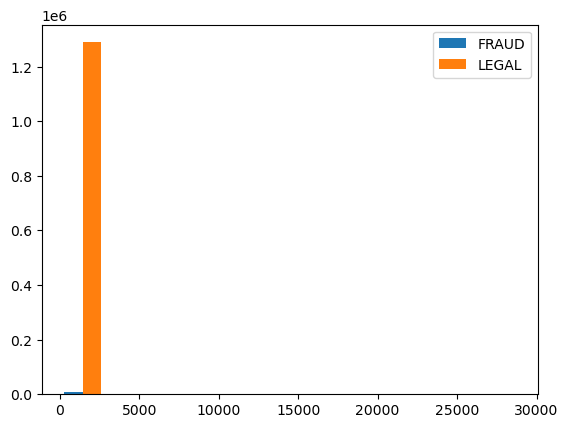

In [6]:
nofraud=data[data.is_fraud==0].amt
yesfraud=data[data.is_fraud==1].amt
outlierFraction = len(yesfraud)/float(len(nofraud))
print(outlierFraction)
plt.hist([yesfraud,nofraud],label=['FRAUD','LEGAL'])
plt.legend()
print("No Fraud Series Shape:", nofraud.shape)
print("Yes Fraud Series Shape:", yesfraud.shape)

In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [9]:
data['is_fraud'].unique()

array([0, 1], dtype=int64)

In [10]:
yesfraud.describe()

count    7506.000000
mean      531.320092
std       390.560070
min         1.060000
25%       245.662500
50%       396.505000
75%       900.875000
max      1376.040000
Name: amt, dtype: float64

In [11]:
yesfraud.describe()

count    7506.000000
mean      531.320092
std       390.560070
min         1.060000
25%       245.662500
50%       396.505000
75%       900.875000
max      1376.040000
Name: amt, dtype: float64

In [12]:
data['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [14]:
columnstoencode = ['merchant', 'category', 'gender', 'state', 'job']
dataencode = data[columnstoencode]
df_encoded = pd.get_dummies(data=dataencode, sparse=True)
data = data.drop(columnstoencode, axis=1)
data = pd.concat([data, df_encoded], axis=1)
print(data.tail())


         Unnamed: 0 trans_date_trans_time               cc_num     amt  \
1296670     1296670   2020-06-21 12:12:08       30263540414123   15.56   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   51.70   
1296672     1296672   2020-06-21 12:12:32     3514865930894695  105.93   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   74.90   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207    4.30   

               first       last                      city    zip      lat  \
1296670         Erik  Patterson                     Hatch  84735  37.7175   
1296671      Jeffrey      White                 Tuscarora  21790  39.2667   
1296672  Christopher  Castaneda  High Rolls Mountain Park  88325  32.9396   
1296673       Joseph     Murray                 Manderson  57756  43.3526   
1296674      Jeffrey      Smith                      Sula  59871  45.8433   

             long  ...  job_Visual merchandiser job_Volunteer coordinator  \
1296670 -112.47

In [15]:
x=data.drop(['is_fraud'],axis=1)
y=data['is_fraud']

In [16]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
columnstoscale = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
x = data[columnstoscale].values
print(x)
#MinMaxScaler instance
scaler = MinMaxScaler()
# batch size for incremental scaling
batch_size = 1000
# Iterate over the data in chunks and scale incrementally
num_samples = x.shape[0]
num_batches = int(np.ceil(num_samples / batch_size))
scaled_data = []
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min((i + 1) * batch_size, num_samples)    
    batch = x[start_idx:end_idx]
    scaled_batch = scaler.fit_transform(batch)
    scaled_data.append(scaled_batch)
x_scaled = np.concatenate(scaled_data, axis=0)
y = data['is_fraud'].values

[[ 4.97000000e+00  3.60788000e+01 -8.11781000e+01 ...  1.32537602e+09
   3.60112930e+01 -8.20483150e+01]
 [ 1.07230000e+02  4.88878000e+01 -1.18210500e+02 ...  1.32537604e+09
   4.91590470e+01 -1.18186462e+02]
 [ 2.20110000e+02  4.21808000e+01 -1.12262000e+02 ...  1.32537605e+09
   4.31507040e+01 -1.12154481e+02]
 ...
 [ 1.05930000e+02  3.29396000e+01 -1.05818900e+02 ...  1.37181675e+09
   3.36195130e+01 -1.05130529e+02]
 [ 7.49000000e+01  4.33526000e+01 -1.02541100e+02 ...  1.37181682e+09
   4.27889400e+01 -1.03241160e+02]
 [ 4.30000000e+00  4.58433000e+01 -1.13874800e+02 ...  1.37181682e+09
   4.65659830e+01 -1.14186110e+02]]


In [17]:
print(x_scaled.shape)
print(y.shape)

(1296675, 7)
(1296675,)


In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_scaled,y, test_size = 0.2, random_state = 0)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

LOGISTIC REGRESSION

In [20]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(max_iter=1000)
lrc.fit(xtrain, ytrain)
LogisticRegression()
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
ypred = lrc.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
print("Accuracy score is: {}%".format(round(accuracy*100,2)))
print(f"Confusion Matrix:\n{confusion_matrix}")
print(f"Classification Report:\n{classification_report}")

Accuracy score is: 99.33%
Confusion Matrix:
<function confusion_matrix at 0x000001DEEE3C1D00>
Classification Report:
<function classification_report at 0x000001DEEE3C2840>


DECISION TREES

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import jaccard_score
Tree = DecisionTreeClassifier()

# Train the model
Tree.fit(xtrain, ytrain)
predictions = Tree.predict(xtest)
Treea = accuracy_score(ytest, predictions)
Treej = jaccard_score(ytest, predictions)
Treef = f1_score(ytest, predictions)
print("Accuracy score is: {}%".format(round(Treea*100,2)))
print("Jaccard score is: ",Treej)
print("F1 score is: ",Treef)

Accuracy score is: 99.01%
Jaccard score is:  0.11238293444328824
F1 score is:  0.2020579981290926
